In [1]:
# Importieren der benötigten Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

In [2]:
data = pd.read_csv("C:\\Users\\Natal\\Documents\\Wirtschaftsinformatik_Master\\2.Semester_WS2023-24\\Explainable Machine Learning\\Prüfungsleistung\\adult income dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data_columns = data.columns
print(data_columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [5]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
#data analysis
n_records = data.shape[0]
n_greater_50k = data[data['income'] == '>50K'].shape[0]
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]
greater_percent = (n_greater_50k / n_records) * 100
print("Total numbber of records: {}".format(n_records))
print("Individuals making more than $50.000: {}".format(n_greater_50k))
print("Individuals making at most $50.000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50.000: {}%".format(greater_percent))

Total numbber of records: 48842
Individuals making more than $50.000: 11687
Individuals making at most $50.000: 37155
Percentage of individuals making more than $50.000: 23.928176569346054%


In [8]:
#data preprocessing
#Nullwerte
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print("{0:.2f}%".format(float(num_non) / num_data * 100))

workclass
2799
5.73%
occupation
2809
5.75%
native-country
857
1.75%


In [9]:
data = data[data["workclass"] != "?"]
data = data[data["occupation"] != "?"]
data = data[data["native-country"] != "?"]
data.shape

(45222, 15)

In [10]:
data.replace('?', np.nan, inplace=True)

# Fill missing values in 'workclass' column with mode
mode_workclass = data['workclass'].mode()[0]
data['workclass'].fillna(mode_workclass, inplace=True)

# Fill missing values in 'occupation' column with mode
mode_occupation = data['occupation'].mode()[0]
data['occupation'].fillna(mode_occupation, inplace=True)

# Fill missing values in 'native.country' column with mode
mode_native_country = data['native-country'].mode()[0]
data['native-country'].fillna(mode_native_country, inplace=True)

In [11]:
# Check for missing values again
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [12]:
# Convert columns with numerical data to numeric data type
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric)

In [13]:
# Drop unnecessary columns
data.drop(['fnlwgt'], axis=1, inplace=True)

In [14]:
corrmat = data.corr()
print(corrmat)

                      age  educational-num  capital-gain  capital-loss  \
age              1.000000         0.037623      0.079683      0.059351   
educational-num  0.037623         1.000000      0.126907      0.081711   
capital-gain     0.079683         0.126907      1.000000     -0.032102   
capital-loss     0.059351         0.081711     -0.032102      1.000000   
hours-per-week   0.101992         0.146206      0.083880      0.054195   

                 hours-per-week  
age                    0.101992  
educational-num        0.146206  
capital-gain           0.083880  
capital-loss           0.054195  
hours-per-week         1.000000  


C:\Users\Natal\AppData\Local\Temp\ipykernel_14732\1282112422.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

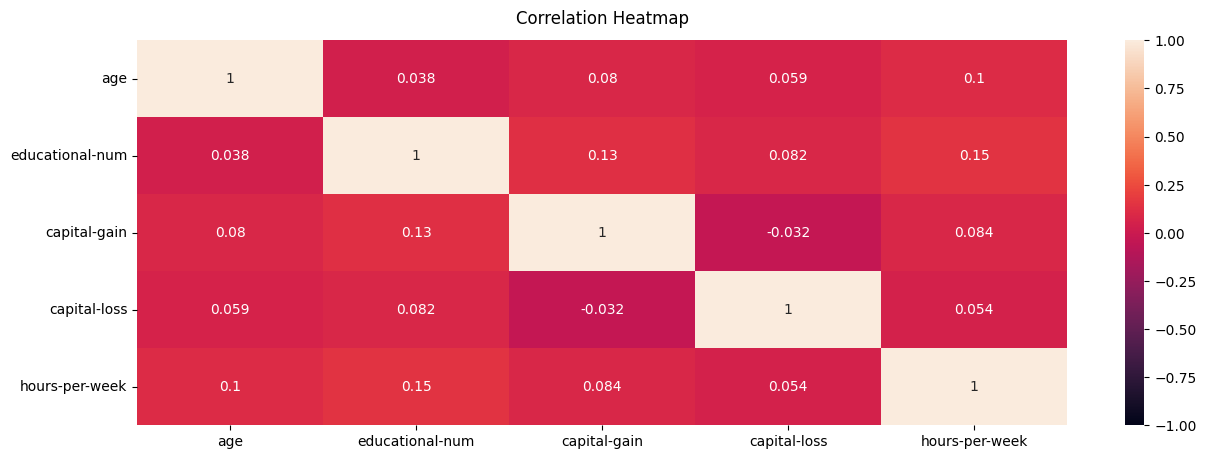

In [15]:
plt.figure(figsize=(15,5))
heatmap = sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [16]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

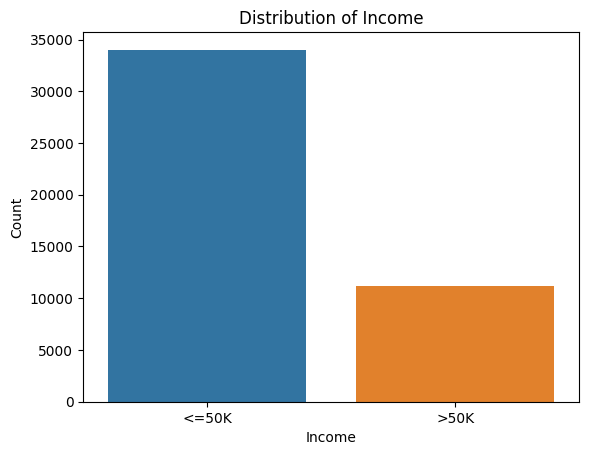

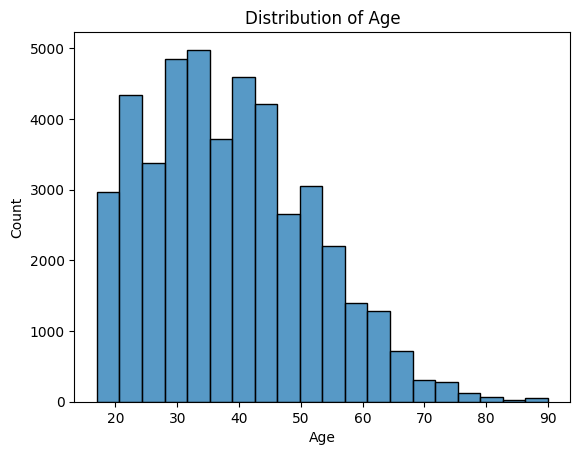

In [17]:
# Visualize the distribution of income
sns.countplot(x='income', data=data)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of age
sns.histplot(data['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

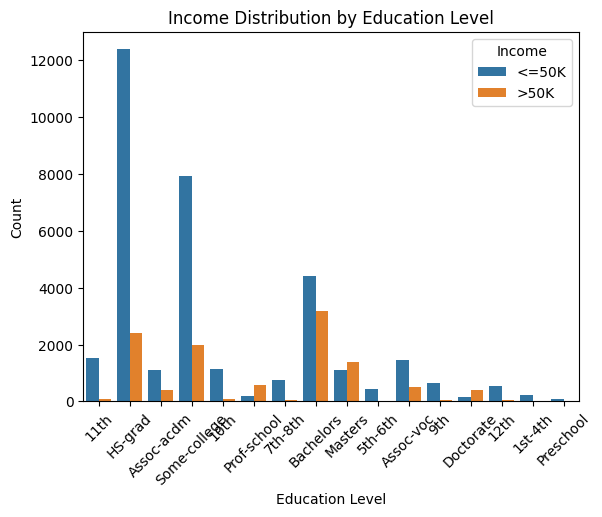

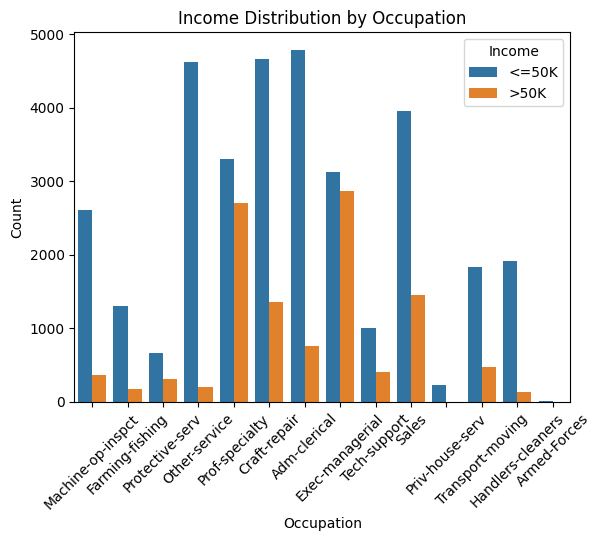

In [18]:
# Visualize the income distribution by education level
sns.countplot(x='education', hue='income', data=data)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

# Visualize the income distribution by occupation
sns.countplot(x='occupation', hue='income', data=data)
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

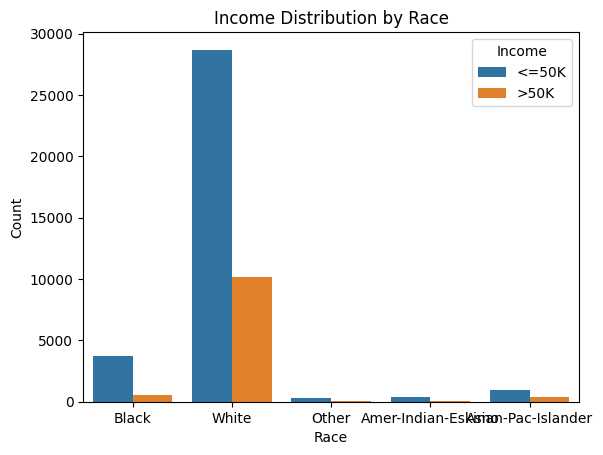

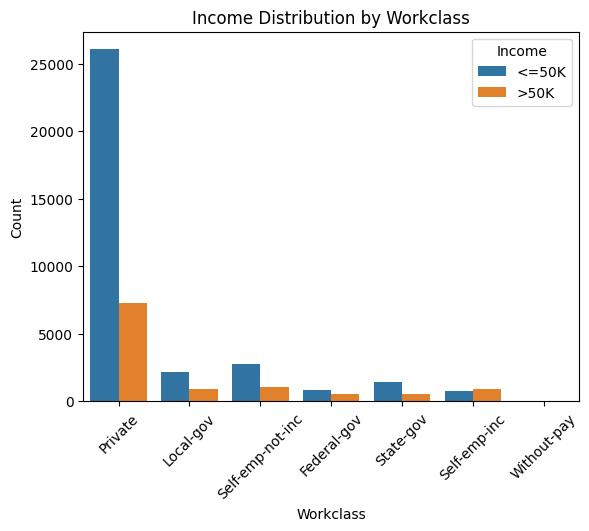

In [19]:
# Visualize the income distribution by race
sns.countplot(x='race', hue='income', data=data)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()


# Visualize the income distribution by workclass
sns.countplot(x='workclass', hue='income', data=data)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

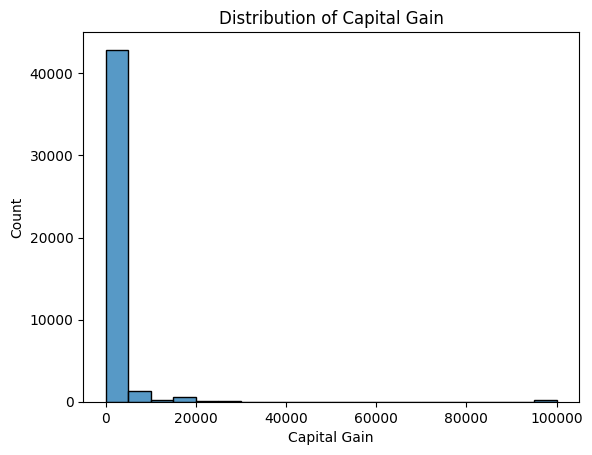

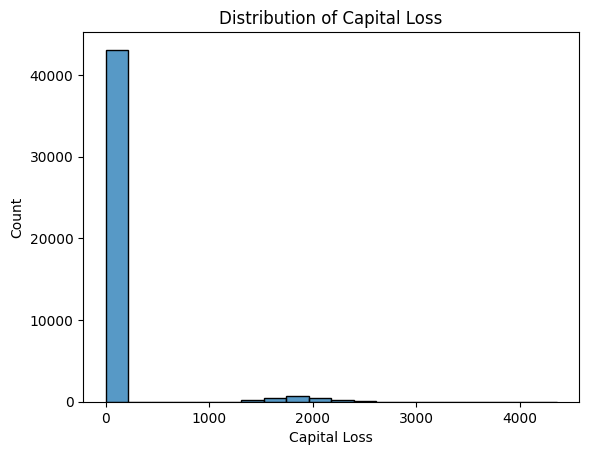

In [20]:
# Visualize the distribution of capital-gain
sns.histplot(data['capital-gain'], bins=20)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of capital-loss
sns.histplot(data['capital-loss'], bins=20)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

In [21]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

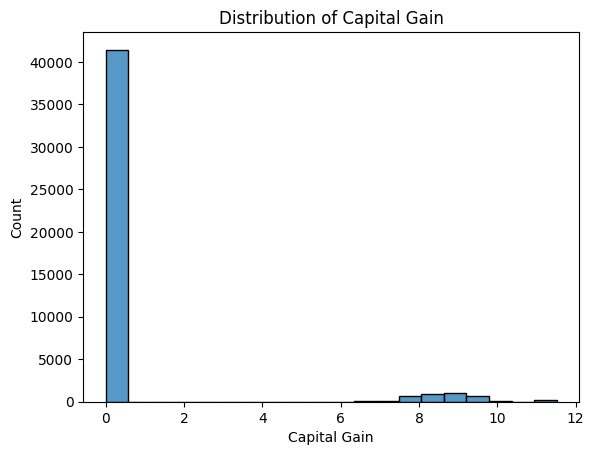

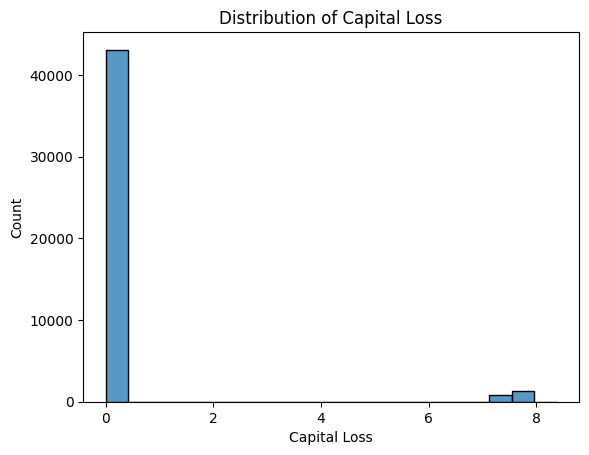

In [22]:
# Visualize the distribution of capital-gain after transformation
sns.histplot(features_log_transformed['capital-gain'], bins=20)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of capital-loss after transformation
sns.histplot(features_log_transformed['capital-loss'], bins=20)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

In [23]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.777174,0.0,0.397959,United-States
5,0.232877,Private,10th,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States


In [24]:
#preprocessing categorial features

features_log_minmax_transform.head(1)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.109589,Private,11th,0.4,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,0.397959,United-States


In [25]:
# Transform Categorial into Numerical
# One-hot encode the 'features_log_minmax_transform' data 
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0,'>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# See the encoded feature names
print (encoded)

103 total features after one-hot encoding.
['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing

In [26]:
#shuffle and split data

# Import train_test_split 
from sklearn.model_selection import train_test_split  

# Split the 'features' and 'income' data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state = 0)  

# Show the results of the split 
print("Training set has {} samples.".format(X_train.shape[0])) 
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


In [27]:
# Performance Evaluation
# Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
TP = np.sum(income) 
# Specific to the naive case
FP = income.count() - TP
# No predicted negatives in the naive case
TN = 0 
FN = 0 

# Calculate accuracy, precision and recall
accuracy = TP / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * ((precision * recall) / ((beta**2) * precision + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


In [28]:
# Creating a Training and Predicting Pipeline
# Import two metrics from sklearn - fbeta_score and accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data 
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
        
    # Get the predictions on the test set
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    
    # Compute accuracy on the first 300 training samples 
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [29]:
# Import and Initialize
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10,   samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.


In [30]:
# Make predictions using the model
predictions = (clf.fit(X_train, y_train)).predict(X_test)

# Report accuracy and fscore
print("Accuracy score on testing data {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))

Accuracy score on testing data 0.6113
F-score on testing data: 0.4352
